In [112]:
import pandas as pd

In [113]:
df=pd.read_csv(r"Data\comprehensive_mutual_funds_data.csv")

In [114]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [116]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [117]:
df["returns_3yr"]=df["returns_3yr"].fillna(df["returns_3yr"].mean())
df["returns_5yr"]=df["returns_5yr"].fillna(df["returns_5yr"].mean())


In [118]:
df.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [211]:
df["NAV_Without_Expenses"]=df["fund_size_cr"]*(1+df["returns_1yr"]/100)
df["Expense_Adjustment"]=df["NAV_Without_Expenses"]*(df["expense_ratio"]/100)
df["NAV_Expenses_Included"]=df["NAV_Without_Expenses"]-df["Expense_Adjustment"]
df["Outstanding_Units"]=df["fund_size_cr"]/df["NAV_Without_Expenses"]
df["Total_Asset"]=df["NAV_Without_Expenses"]*df["Outstanding_Units"]
df["Total_Liabilities"]=df["Total_Asset"]-(df["NAV_Expenses_Included"]*df["Outstanding_Units"])

In [212]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,returns_1yr,returns_3yr,returns_5yr,NAV_Without_Expenses,Expense_Adjustment,NAV_Expenses_Included,Outstanding_Units,Total_Asset,Total_Liabilities,NAV
0,33,100,100,0.27,10.0,10,102,0.32,2.24,9.39,...,4.0,6.5,6.900000,10.400,0.028080,10.371920,0.961538,10.0,0.0270,10.371920
1,34,1000,1000,0.36,4288.0,10,113,1.33,1.53,0.72,...,5.6,4.8,5.500000,4528.128,16.301261,4511.826739,0.946970,4288.0,15.4368,4511.826739
2,35,1000,1000,0.53,157.0,10,251,3.44,2.67,10.58,...,2.0,18.9,9.700000,160.140,0.848742,159.291258,0.980392,157.0,0.8321,159.291258
3,36,500,1000,0.76,637.0,4,47,2.18,-6.37,14.99,...,-0.7,17.1,9.490726,632.541,4.807312,627.733688,1.007049,637.0,4.8412,627.733688
4,37,100,100,0.61,6386.0,10,130,3.69,1.99,10.38,...,4.5,18.6,9.700000,6673.370,40.707557,6632.662443,0.956938,6386.0,38.9546,6632.662443


In [213]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,returns_1yr,returns_3yr,returns_5yr,NAV_Without_Expenses,Expense_Adjustment,NAV_Expenses_Included,Outstanding_Units,Total_Asset,Total_Liabilities,NAV
0,33,100,100,0.27,10.0,10,102,0.32,2.24,9.39,...,4.0,6.5,6.900000,10.400,0.028080,10.371920,0.961538,10.0,0.0270,10.371920
1,34,1000,1000,0.36,4288.0,10,113,1.33,1.53,0.72,...,5.6,4.8,5.500000,4528.128,16.301261,4511.826739,0.946970,4288.0,15.4368,4511.826739
2,35,1000,1000,0.53,157.0,10,251,3.44,2.67,10.58,...,2.0,18.9,9.700000,160.140,0.848742,159.291258,0.980392,157.0,0.8321,159.291258
3,36,500,1000,0.76,637.0,4,47,2.18,-6.37,14.99,...,-0.7,17.1,9.490726,632.541,4.807312,627.733688,1.007049,637.0,4.8412,627.733688
4,37,100,100,0.61,6386.0,10,130,3.69,1.99,10.38,...,4.5,18.6,9.700000,6673.370,40.707557,6632.662443,0.956938,6386.0,38.9546,6632.662443


In [214]:
df["NAV"]=(df["Total_Asset"]-df["Total_Liabilities"])/df["Outstanding_Units"]

In [215]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,returns_1yr,returns_3yr,returns_5yr,NAV_Without_Expenses,Expense_Adjustment,NAV_Expenses_Included,Outstanding_Units,Total_Asset,Total_Liabilities,NAV
0,33,100,100,0.27,10.0,10,102,0.32,2.24,9.39,...,4.0,6.5,6.900000,10.400,0.028080,10.371920,0.961538,10.0,0.0270,10.371920
1,34,1000,1000,0.36,4288.0,10,113,1.33,1.53,0.72,...,5.6,4.8,5.500000,4528.128,16.301261,4511.826739,0.946970,4288.0,15.4368,4511.826739
2,35,1000,1000,0.53,157.0,10,251,3.44,2.67,10.58,...,2.0,18.9,9.700000,160.140,0.848742,159.291258,0.980392,157.0,0.8321,159.291258
3,36,500,1000,0.76,637.0,4,47,2.18,-6.37,14.99,...,-0.7,17.1,9.490726,632.541,4.807312,627.733688,1.007049,637.0,4.8412,627.733688
4,37,100,100,0.61,6386.0,10,130,3.69,1.99,10.38,...,4.5,18.6,9.700000,6673.370,40.707557,6632.662443,0.956938,6386.0,38.9546,6632.662443


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   scheme_name            814 non-null    int64  
 1   min_sip                814 non-null    int64  
 2   min_lumpsum            814 non-null    int64  
 3   expense_ratio          814 non-null    float64
 4   fund_size_cr           814 non-null    float64
 5   fund_age_yr            814 non-null    int64  
 6   fund_manager           814 non-null    int64  
 7   sortino                791 non-null    float64
 8   alpha                  772 non-null    float64
 9   sd                     790 non-null    float64
 10  beta                   772 non-null    float64
 11  sharpe                 791 non-null    float64
 12  risk_level             814 non-null    int64  
 13  amc_name               814 non-null    int64  
 14  rating                 814 non-null    int64  
 15  catego

In [217]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [218]:
columns=["scheme_name","fund_manager","amc_name","category","sub_category"]                       
for col in columns:
    df[col]=LE.fit_transform(df[col])

In [219]:
df[['sortino', 'alpha', 'sd', 'beta', 'sharpe']] = df[['sortino', 'alpha', 'sd', 'beta', 'sharpe']].apply(pd.to_numeric, errors='coerce')
              

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   scheme_name            814 non-null    int64  
 1   min_sip                814 non-null    int64  
 2   min_lumpsum            814 non-null    int64  
 3   expense_ratio          814 non-null    float64
 4   fund_size_cr           814 non-null    float64
 5   fund_age_yr            814 non-null    int64  
 6   fund_manager           814 non-null    int64  
 7   sortino                791 non-null    float64
 8   alpha                  772 non-null    float64
 9   sd                     790 non-null    float64
 10  beta                   772 non-null    float64
 11  sharpe                 791 non-null    float64
 12  risk_level             814 non-null    int64  
 13  amc_name               814 non-null    int64  
 14  rating                 814 non-null    int64  
 15  catego

In [221]:
# Correlation_matrix

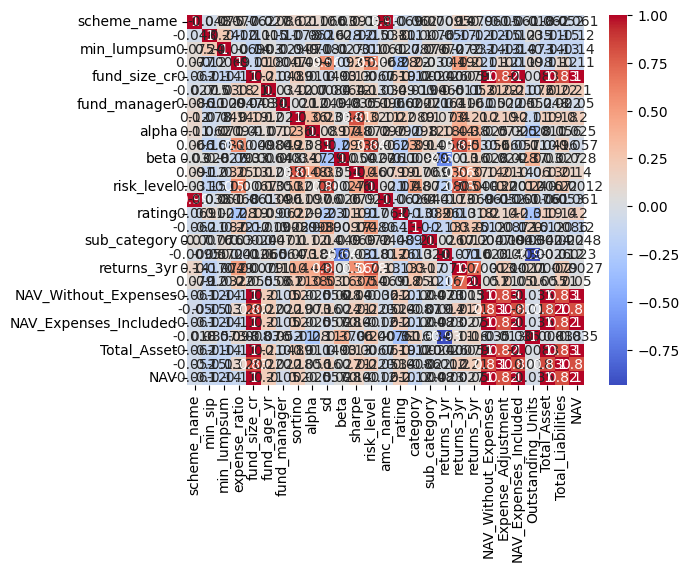

In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation with target variable 'protection' (example)
correlation_matrix = df.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Random Forest Feature Importance


In [223]:
from sklearn.ensemble import RandomForestRegressor
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [224]:
X.fillna(X.mean(), inplace=True)

                  Feature  Importance
20   NAV_Without_Expenses    0.392409
22  NAV_Expenses_Included    0.361720
4            fund_size_cr    0.125399
24            Total_Asset    0.118027
21     Expense_Adjustment    0.000347
10                   beta    0.000203
2             min_lumpsum    0.000152
6            fund_manager    0.000143
18            returns_3yr    0.000143
13               amc_name    0.000143
7                 sortino    0.000126
14                 rating    0.000116
25      Total_Liabilities    0.000114
3           expense_ratio    0.000113
0             scheme_name    0.000100
1                 min_sip    0.000098
19            returns_5yr    0.000093
8                   alpha    0.000091
12             risk_level    0.000081
16           sub_category    0.000078
23      Outstanding_Units    0.000065
9                      sd    0.000061
17            returns_1yr    0.000060
11                 sharpe    0.000057
15               category    0.000057
5           

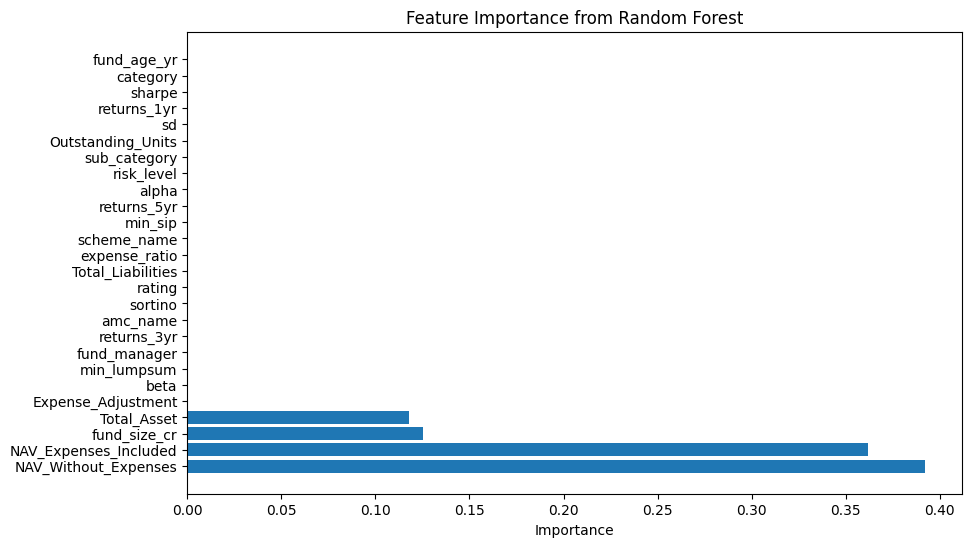

In [225]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# X: features, Y: target variable
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)  # Fit the model

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for easy reading
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [ ]:
# Decision Tree Feature Importance

In [226]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X, Y)  # Fit the model

# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame for easy reading
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                  Feature    Importance
22  NAV_Expenses_Included  6.825279e-01
20   NAV_Without_Expenses  2.678860e-01
24            Total_Asset  4.690372e-02
4            fund_size_cr  2.068947e-03
1                 min_sip  3.942578e-04
19            returns_5yr  1.064366e-04
6            fund_manager  4.320186e-05
16           sub_category  2.122173e-05
10                   beta  1.062087e-05
0             scheme_name  8.790828e-06
9                      sd  5.715801e-06
14                 rating  3.864419e-06
8                   alpha  3.424745e-06
25      Total_Liabilities  2.969565e-06
17            returns_1yr  2.739816e-06
23      Outstanding_Units  2.723286e-06
13               amc_name  2.222641e-06
3           expense_ratio  1.610542e-06
18            returns_3yr  1.598828e-06
11                 sharpe  5.592589e-07
2             min_lumpsum  4.502248e-07
12             risk_level  3.966582e-07
21     Expense_Adjustment  2.833151e-07
7                 sortino  1.789306e-07


In [168]:
#Gradient Boosting Regressor

In [172]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X, Y)  # Fit the model

# Get feature importances
feature_importances = gb.feature_importances_

# Create a DataFrame for easy reading
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                  Feature    Importance
20   NAV_Without_Expenses  4.677810e-01
22  NAV_Expenses_Included  4.072715e-01
24            Total_Asset  1.160696e-01
4            fund_size_cr  8.762562e-03
0             scheme_name  1.034499e-04
3           expense_ratio  4.818140e-06
10                   beta  1.591839e-06
21     Expense_Adjustment  7.921630e-07
9                      sd  7.798891e-07
19            returns_5yr  5.983731e-07
18            returns_3yr  4.858252e-07
25      Total_Liabilities  4.701126e-07
8                   alpha  4.176959e-07
11                 sharpe  3.300627e-07
1                 min_sip  2.964929e-07
7                 sortino  2.674026e-07
15               category  2.460004e-07
6            fund_manager  2.138123e-07
23      Outstanding_Units  1.799375e-07
16           sub_category  1.755826e-07
17            returns_1yr  1.286507e-07
13               amc_name  7.315120e-08
12             risk_level  0.000000e+00
14                 rating  0.000000e+00


In [ ]:
# SHAP (Shapley Additive exPlanations) Values 

In [231]:
import pandas as pd
import numpy as np
import shap

# Fit the model and compute SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

# Calculate mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)

# Convert to a DataFrame for better handling
shap_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean_SHAP_Value": mean_shap_values
}).sort_values(by="Mean_SHAP_Value", ascending=False)

# Display the SHAP importance values
print(shap_importance_df)

# Set a threshold (e.g., keep features contributing > 0.01 SHAP value)
threshold = 0.01
important_features = shap_importance_df[
    shap_importance_df["Mean_SHAP_Value"] > threshold
]["Feature"].tolist()

# Filter the dataset to retain only important features
X_filtered = X[important_features]

# Display the remaining features
print(f"Selected {len(important_features)} features out of {X.shape[1]} total features:")
print(important_features)


                  Feature  Mean_SHAP_Value
20   NAV_Without_Expenses      1989.432260
22  NAV_Expenses_Included      1826.900743
4            fund_size_cr       432.128579
24            Total_Asset       412.666872
7                 sortino         2.247276
6            fund_manager         2.197235
21     Expense_Adjustment         1.678289
25      Total_Liabilities         1.629144
1                 min_sip         1.526070
10                   beta         1.466956
13               amc_name         1.446379
18            returns_3yr         1.350541
0             scheme_name         1.150847
2             min_lumpsum         1.121018
23      Outstanding_Units         1.023548
3           expense_ratio         0.999016
14                 rating         0.902008
11                 sharpe         0.888530
9                      sd         0.872718
8                   alpha         0.867626
19            returns_5yr         0.865793
17            returns_1yr         0.766748
16         